In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ruta relativa al archivo CSV desde la ubicación actual del proyecto
file_path = '../E1_database.csv'

# Leer el archivo CSV
df = pd.read_csv(file_path)
df.head()

,Id,Class,relabeledClassArray,Finger_1,Finger_2,Finger_3,Finger_4,Finger_5,Finger_6,MAVs_1,...,WL_3,WL_4,WL_5,WL_6,WL_7,WL_8,WL_9,WL_10,WL_11,WL_12
0,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000005,...,0.000215,0.000195,0.000231,0.000244,0.000304,0.000303,0.000275,0.000258,0.000226,0.001090
1,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000007,...,0.000262,0.000214,0.000237,0.000231,0.000316,0.000335,0.000233,0.000264,0.000253,0.000879
2,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000004,...,0.000246,0.000199,0.000249,0.000242,0.000310,0.000337,0.000253,0.000239,0.000235,0.000748
3,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000004,...,0.000230,0.000210,0.000227,0.000222,0.000302,0.000312,0.000227,0.000263,0.000194,0.000853
4,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000004,...,0.000229,0.000220,0.000227,0.000232,0.000303,0.000344,0.000259,0.000227,0.000225,0.000770


In [2]:
df.drop(df[(df.Class !=0) & (df.Class !=17)&(df.Class !=13)&(df.Class !=4)].index, inplace=True)
df = df.drop("Finger_1","Finger_3","Finger_4","Finger_5","Finger_6", axis='columns')
df.head()

,Id,Class,relabeledClassArray,Finger_1,Finger_2,Finger_3,Finger_4,Finger_5,Finger_6,MAVs_1,...,WL_3,WL_4,WL_5,WL_6,WL_7,WL_8,WL_9,WL_10,WL_11,WL_12
0,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000005,...,0.000215,0.000195,0.000231,0.000244,0.000304,0.000303,0.000275,0.000258,0.000226,0.001090
1,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000007,...,0.000262,0.000214,0.000237,0.000231,0.000316,0.000335,0.000233,0.000264,0.000253,0.000879
2,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000004,...,0.000246,0.000199,0.000249,0.000242,0.000310,0.000337,0.000253,0.000239,0.000235,0.000748
3,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000004,...,0.000230,0.000210,0.000227,0.000222,0.000302,0.000312,0.000227,0.000263,0.000194,0.000853
4,1,0,0,24.99676,34.7309,36.78346,24.40806,13.94827,3.736245,0.000004,...,0.000229,0.000220,0.000227,0.000232,0.000303,0.000344,0.000259,0.000227,0.000225,0.000770


In [3]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

df = remove_outliers_iqr(df)


In [4]:
df.head()

,Id,Class,relabeledClassArray,Finger_1,Finger_2,Finger_3,Finger_4,Finger_5,Finger_6,MAVs_1,...,WL_3,WL_4,WL_5,WL_6,WL_7,WL_8,WL_9,WL_10,WL_11,WL_12
232,1,0,0,27.19913,35.76149,44.40695,31.60807,19.59534,2.884948,0.000004,...,0.000208,0.000218,0.000210,0.000226,0.000329,0.000297,0.000262,0.000284,0.000218,0.000238
2792,1,0,0,18.38969,34.73090,43.13638,29.44807,17.33651,0.880723,0.000003,...,0.000218,0.000189,0.000214,0.000206,0.000313,0.000245,0.000232,0.000248,0.000218,0.000280
3152,1,0,0,22.06029,32.66973,44.40695,28.72807,18.46592,1.844474,0.000003,...,0.000223,0.000205,0.000233,0.000234,0.000328,0.000314,0.000301,0.000299,0.000258,0.000282
3235,1,0,0,63.90508,75.95454,88.87743,64.00816,18.46592,7.519782,0.000002,...,0.000222,0.000199,0.000263,0.000264,0.000300,0.000277,0.000280,0.000316,0.000222,0.000265
3244,1,0,0,63.17099,74.92393,87.60689,61.84814,18.46592,7.519782,0.000003,...,0.000195,0.000177,0.000223,0.000210,0.000318,0.000305,0.000233,0.000279,0.000228,0.000274


In [5]:
df.describe()

,Id,Class,relabeledClassArray,Finger_1,Finger_2,Finger_3,Finger_4,Finger_5,Finger_6,MAVs_1,...,WL_3,WL_4,WL_5,WL_6,WL_7,WL_8,WL_9,WL_10,WL_11,WL_12
count,4617.000000,4617.0,4617.0,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,...,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,22.683777,0.0,0.0,25.391495,30.402206,29.914939,26.649699,12.341048,8.235346,0.000003,...,0.000242,0.000220,0.000230,0.000232,0.000269,0.000307,0.000258,0.000275,0.000252,0.000282
std,12.046868,0.0,0.0,16.235182,18.276582,22.836497,16.463073,7.649689,6.210877,0.000001,...,0.000029,0.000022,0.000021,0.000021,0.000031,0.000051,0.000029,0.000032,0.000030,0.000043
min,1.000000,0.0,0.0,0.036706,2.782594,0.062979,0.582923,0.356638,0.047294,0.000001,...,0.000160,0.000159,0.000172,0.000176,0.000187,0.000189,0.000182,0.000184,0.000165,0.000178
25%,11.000000,0.0,0.0,12.516730,17.210860,11.371740,14.328040,5.251778,2.884948,0.000002,...,0.000221,0.000204,0.000215,0.000217,0.000246,0.000266,0.000237,0.000253,0.000229,0.000251
50%,24.000000,0.0,0.0,22.060290,26.486180,25.348190,24.408060,12.818860,7.519782,0.000003,...,0.000242,0.000218,0.000230,0.000230,0.000267,0.000302,0.000254,0.000275,0.000249,0.000274
75%,34.000000,0.0,0.0,33.806200,39.883850,40.595210,38.088090,18.465920,13.289680,0.000003,...,0.000261,0.000234,0.000244,0.000245,0.000288,0.000341,0.000277,0.000297,0.000273,0.000306
max,40.000000,0.0,0.0,74.984300,91.413380,101.583300,79.848180,33.676270,23.865840,0.000017,...,0.000327,0.000285,0.000292,0.000292,0.000357,0.000457,0.000343,0.000366,0.000342,0.000402


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4617 entries, 232 to 349392
Data columns (total 69 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   4617 non-null   int64  
 1   Class                4617 non-null   int64  
 2   relabeledClassArray  4617 non-null   int64  
 3   Finger_1             4617 non-null   float64
 4   Finger_2             4617 non-null   float64
 5   Finger_3             4617 non-null   float64
 6   Finger_4             4617 non-null   float64
 7   Finger_5             4617 non-null   float64
 8   Finger_6             4617 non-null   float64
 9   MAVs_1               4617 non-null   float64
 10  MAVs_2               4617 non-null   float64
 11  MAVs_3               4617 non-null   float64
 12  MAVs_4               4617 non-null   float64
 13  MAVs_5               4617 non-null   float64
 14  MAVs_6               4617 non-null   float64
 15  MAVs_7               4617 non-null   fl

In [7]:
df.dtypes

Id                       int64
Class                    int64
relabeledClassArray      int64
Finger_1               float64
Finger_2               float64
                        ...   
WL_8                   float64
WL_9                   float64
WL_10                  float64
WL_11                  float64
WL_12                  float64
Length: 69, dtype: object

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 69)


Analisis univariante

<Axes: xlabel='Finger_2', ylabel='Count'>

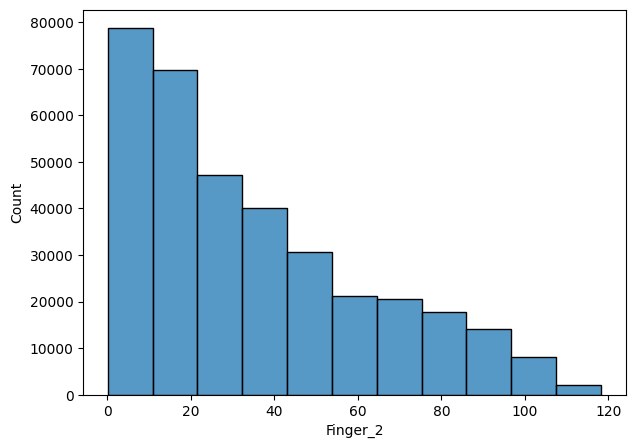

In [10]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Finger_2', bins=11)

Análisis Bivariante

In [ ]:
sns.pairplot(df)

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='magma', annot=True)

In [ ]:
sns.heatmap(df.corr(), cmap='magma', annot=True)